## Featurization Model Selection and Tuning

### Domain - Cement manufacturing
###  Project 05
***Objective***
- Modeling of strength of high performance concrete using Machine Learning

### 1 Importing the necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes = True)

from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.utils import resample

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [2]:
## Reading File
concrete = pd.read_csv('concrete.csv')
concrete.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

## 1. Deliverable 

## a - Univariate analysis

In [3]:
concrete.shape

(1030, 9)

## Shape of Data (1030) Rows and (9) Columns

In [4]:
## Find Null Values
concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

## No Null or missing Values in Data

In [5]:
concrete.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [6]:
concrete.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

### All Colums has numeric Values No Conversation is required

In [7]:
#columns name
concrete.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [8]:
# distribution of the dataset
concrete.describe().T

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

## description of the independent attributes 

### Cement 

In [9]:
# Central values
print('\n Central values \n')
cmin = concrete['cement'].min()
cmax = concrete['cement'].max()
cmean = concrete['cement'].mean()
cmedian = concrete['cement'].median()
cstd = concrete['cement'].std()
crangeval = cmax - cmin
print('Cement Minimum age: ', cmin)
print('Cement Maximum age: ',cmax)
print('Cement Mean value: ', cmean)
print('Cement Median value: ',cmedian)
print('Cement Standard deviation: ', cstd)
print('Cement Range of values: ', crangeval)

## Quartiles
print('\n Quartiles \n')
cQ1=concrete['cement'].quantile(q=0.25)
cQ3=concrete['cement'].quantile(q=0.75)
ciqr = stats.iqr(concrete['cement'])
print('Cement 1st Quartile (Q1) is: ', cQ1)
print('Cement 3st Quartile (Q3) is: ', cQ3)
print('Cement Interquartile range (IQR) is ', ciqr)

# Outliers
print('\n Outliers \n')
clowoutliers=cQ1-1.5*(cQ3-cQ1)
cupoutliers=cQ3+1.5*(cQ3-cQ1)
print('Cement Lower Outliers: ', clowoutliers)
print('Cement Upper Outliers: ', cupoutliers)
print('\nCement Number of Lower Outliers is: ', concrete[concrete['cement']<clowoutliers]['cement'].count())
print('Cement Number of Upper Outliers is: ', concrete[concrete['cement']>cupoutliers]['cement'].count())
print('\nPercentage of Lower Outlier is: ',round(concrete[concrete['cement']<clowoutliers]['cement'].count()*100/len(concrete)), '%')
print('Percentage of Upper Outlier is: ',round(concrete[concrete['cement']>cupoutliers]['cement'].count()*100/len(concrete)), '%')


 Central values 

Cement Minimum age:  102.0
Cement Maximum age:  540.0
Cement Mean value:  281.1678640776698
Cement Median value:  272.9
Cement Standard deviation:  104.50636449481536
Cement Range of values:  438.0

 Quartiles 

Cement 1st Quartile (Q1) is:  192.375
Cement 3st Quartile (Q3) is:  350.0
Cement Interquartile range (IQR) is  157.625

 Outliers 

Cement Lower Outliers:  -44.0625
Cement Upper Outliers:  586.4375

Cement Number of Lower Outliers is:  0
Cement Number of Upper Outliers is:  0

Percentage of Lower Outlier is:  0.0 %
Percentage of Upper Outlier is:  0.0 %


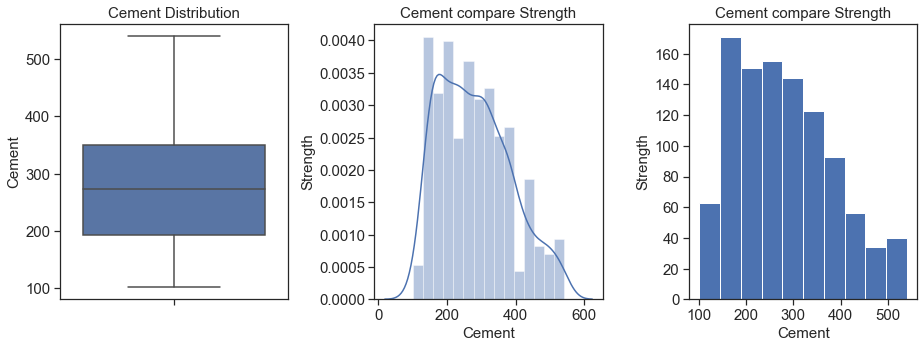

In [10]:
fig, (cx1,cx2,cx3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='cement',data=concrete,orient='v',ax=cx1)
cx1.set_ylabel('Cement', fontsize=15)
cx1.set_title('Cement Distribution', fontsize=15)
cx1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete['cement'],ax=cx2)
cx2.set_xlabel('Cement', fontsize=15)
cx2.set_ylabel('Strength', fontsize=15)
cx2.set_title('Cement compare Strength', fontsize=15)
cx2.tick_params(labelsize=15)

#histogram
cx3.hist(concrete['cement'])
cx3.set_xlabel('Cement', fontsize=15)
cx3.set_ylabel('Strength', fontsize=15)
cx3.set_title('Cement compare Strength', fontsize=15)
cx3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Slag 

In [11]:
# Central values
print('\n Central values \n')
slagmin = concrete['slag'].min()
slagmax = concrete['slag'].max()
slagmean = concrete['slag'].mean()
slagmedian = concrete['slag'].median()
slagstd = concrete['slag'].std()
slagrangeval = slagmax - slagmin
print('slag Minimum age: ', slagmin)
print('slag Maximum age: ',slagmax)
print('slag Mean value: ', slagmean)
print('slag Median value: ',slagmedian)
print('slag Standard deviation: ', slagstd)
print('slag Range of values: ', slagrangeval)

## Quartiles
print('\n Quartiles \n')
slagQ1=concrete['slag'].quantile(q=0.25)
slagQ3=concrete['slag'].quantile(q=0.75)
slagIqr = stats.iqr(concrete['slag'])
print('slag 1st Quartile (Q1) is: ', slagQ1)
print('slag 3st Quartile (Q3) is: ', slagQ3)
print('slag Interquartile range (IQR) is ', slagIqr)

# Outliers
print('\n Outliers \n')
slagLoutliers=slagQ1-1.5*(slagQ3-slagQ1)
slagUoutliers=slagQ3+1.5*(slagQ3-slagQ1)
print('slag Lower Outliers: ', slagLoutliers)
print('slag Upper Outliers: ', slagUoutliers)
print('\nslag Number of Lower Outliers is: ', concrete[concrete['slag']<slagLoutliers]['slag'].count())
print('slag Number of Upper Outliers is: ', concrete[concrete['slag']>slagUoutliers]['slag'].count())
print('\nPercentage of Lower Outlier is: ',round(concrete[concrete['slag']<slagLoutliers]['slag'].count()*100/len(concrete)), '%')
print('Percentage of Upper Outlier is: ',round(concrete[concrete['slag']>slagUoutliers]['slag'].count()*100/len(concrete)), '%')


 Central values 

slag Minimum age:  0.0
slag Maximum age:  359.4
slag Mean value:  73.89582524271844
slag Median value:  22.0
slag Standard deviation:  86.2793417481054
slag Range of values:  359.4

 Quartiles 

slag 1st Quartile (Q1) is:  0.0
slag 3st Quartile (Q3) is:  142.95
slag Interquartile range (IQR) is  142.95

 Outliers 

slag Lower Outliers:  -214.42499999999998
slag Upper Outliers:  357.375

slag Number of Lower Outliers is:  0
slag Number of Upper Outliers is:  2

Percentage of Lower Outlier is:  0.0 %
Percentage of Upper Outlier is:  0.0 %


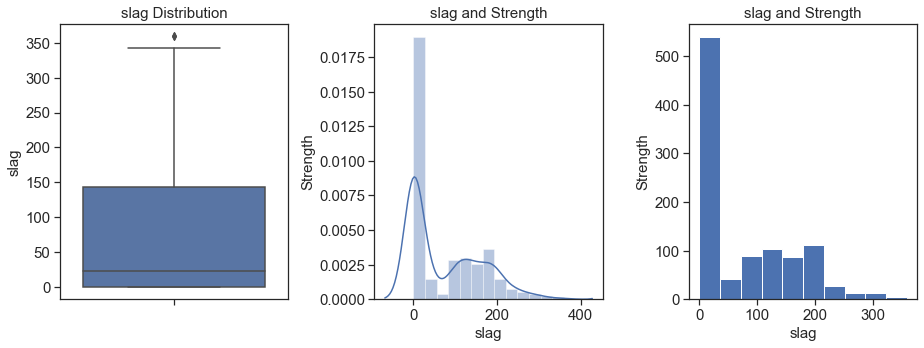

In [12]:
fig, (slag1,slag2,slag3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='slag',data=concrete,orient='v',ax=slag1)
slag1.set_ylabel('slag', fontsize=15)
slag1.set_title('slag Distribution', fontsize=15)
slag1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete['slag'],ax=slag2)
slag2.set_xlabel('slag', fontsize=15)
slag2.set_ylabel('Strength', fontsize=15)
slag2.set_title('slag and Strength', fontsize=15)
slag2.tick_params(labelsize=15)

#histogram
slag3.hist(concrete['slag'])
slag3.set_xlabel('slag', fontsize=15)
slag3.set_ylabel('Strength', fontsize=15)
slag3.set_title('slag and Strength', fontsize=15)
slag3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Ash

In [13]:
# Central values
print('\n Central values \n')
ashmin = concrete['ash'].min()
ashmax = concrete['ash'].max()
ashmean = concrete['ash'].mean()
ashmedian = concrete['ash'].median()
ashstd = concrete['ash'].std()
ashrangeval = ashmax - ashmin
print('ash Minimum age: ', ashmin)
print('ash Maximum age: ',ashmax)
print('ash Mean value: ', ashmean)
print('ash Median value: ',ashmedian)
print('ash Standard deviation: ', ashstd)
print('ash Range of values: ', ashrangeval)

## Quartiles
print('\n Quartiles \n')
ashQ1=concrete['ash'].quantile(q=0.25)
ashQ3=concrete['ash'].quantile(q=0.75)
ashIqr = stats.iqr(concrete['ash'])
print('ash 1st Quartile (Q1) is: ', ashQ1)
print('ash 3st Quartile (Q3) is: ', ashQ3)
print('ash Interquartile range (IQR) is ', ashIqr)

# Outliers
print('\n Outliers \n')
ashLoutliers=ashQ1-1.5*(ashQ3-ashQ1)
ashUoutliers=ashQ3+1.5*(ashQ3-ashQ1)
print('ash Lower Outliers: ', ashLoutliers)
print('ash Upper Outliers: ', ashUoutliers)
print('\nash Number of Lower Outliers is: ', concrete[concrete['ash']<ashLoutliers]['ash'].count())
print('ash Number of Upper Outliers is: ', concrete[concrete['ash']>ashUoutliers]['ash'].count())
print('\nPercentage of Lower Outlier is: ',round(concrete[concrete['ash']<ashLoutliers]['ash'].count()*100/len(concrete)), '%')
print('Percentage of Upper Outlier is: ',round(concrete[concrete['ash']>ashUoutliers]['ash'].count()*100/len(concrete)), '%')


 Central values 

ash Minimum age:  0.0
ash Maximum age:  200.1
ash Mean value:  54.188349514563086
ash Median value:  0.0
ash Standard deviation:  63.99700415268794
ash Range of values:  200.1

 Quartiles 

ash 1st Quartile (Q1) is:  0.0
ash 3st Quartile (Q3) is:  118.3
ash Interquartile range (IQR) is  118.3

 Outliers 

ash Lower Outliers:  -177.45
ash Upper Outliers:  295.75

ash Number of Lower Outliers is:  0
ash Number of Upper Outliers is:  0

Percentage of Lower Outlier is:  0.0 %
Percentage of Upper Outlier is:  0.0 %


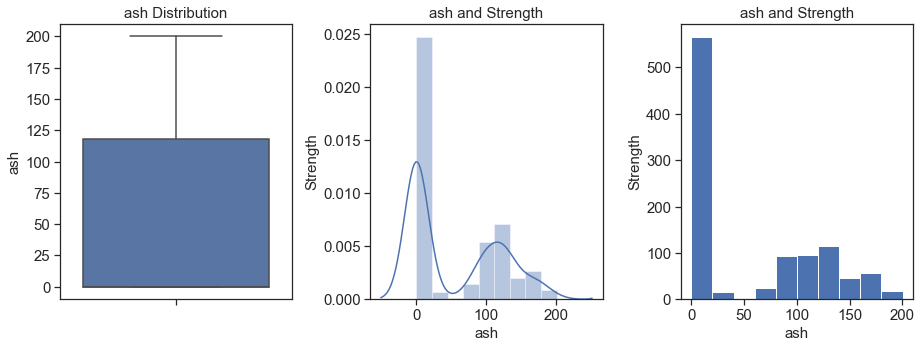

In [14]:
fig, (ash1,ash2,ash3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='ash',data=concrete,orient='v',ax=ash1)
ash1.set_ylabel('ash', fontsize=15)
ash1.set_title('ash Distribution', fontsize=15)
ash1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete['ash'],ax=ash2)
ash2.set_xlabel('ash', fontsize=15)
ash2.set_ylabel('Strength', fontsize=15)
ash2.set_title('ash and Strength', fontsize=15)
ash2.tick_params(labelsize=15)

#histogram
ash3.hist(concrete['ash'])
ash3.set_xlabel('ash', fontsize=15)
ash3.set_ylabel('Strength', fontsize=15)
ash3.set_title('ash and Strength', fontsize=15)
ash3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Water

In [15]:
# Central values
print('\n Central values \n')
watermin = concrete['water'].min()
watermax = concrete['water'].max()
watermean = concrete['water'].mean()
watermedian = concrete['water'].median()
waterstd = concrete['water'].std()
waterrangeval = watermax - watermin
print('water Minimum age: ', watermin)
print('water Maximum age: ',watermax)
print('water Mean value: ', watermean)
print('water Median value: ',watermedian)
print('water Standard deviation: ', waterstd)
print('water Range of values: ', waterrangeval)

## Quartiles
print('\n Quartiles \n')
waterQ1=concrete['water'].quantile(q=0.25)
waterQ3=concrete['water'].quantile(q=0.75)
waterIqr = stats.iqr(concrete['water'])
print('water 1st Quartile (Q1) is: ', waterQ1)
print('water 3st Quartile (Q3) is: ', waterQ3)
print('water Interquartile range (IQR) is ', waterIqr)

# Outliers
print('\n Outliers \n')
waterLoutliers=waterQ1-1.5*(waterQ3-waterQ1)
waterUoutliers=waterQ3+1.5*(waterQ3-waterQ1)
print('water Lower Outliers: ', waterLoutliers)
print('water Upper Outliers: ', waterUoutliers)
print('\nwater Number of Lower Outliers is: ', concrete[concrete['water']<waterLoutliers]['water'].count())
print('water Number of Upper Outliers is: ', concrete[concrete['water']>waterUoutliers]['water'].count())
print('\nPercentage of Lower Outlier is: ',round(concrete[concrete['water']<waterLoutliers]['water'].count()*100/len(concrete)), '%')
print('Percentage of Upper Outlier is: ',round(concrete[concrete['water']>waterUoutliers]['water'].count()*100/len(concrete)), '%')


 Central values 

water Minimum age:  121.8
water Maximum age:  247.0
water Mean value:  181.56728155339798
water Median value:  185.0
water Standard deviation:  21.35421856503245
water Range of values:  125.2

 Quartiles 

water 1st Quartile (Q1) is:  164.9
water 3st Quartile (Q3) is:  192.0
water Interquartile range (IQR) is  27.099999999999994

 Outliers 

water Lower Outliers:  124.25000000000001
water Upper Outliers:  232.64999999999998

water Number of Lower Outliers is:  5
water Number of Upper Outliers is:  4

Percentage of Lower Outlier is:  0.0 %
Percentage of Upper Outlier is:  0.0 %


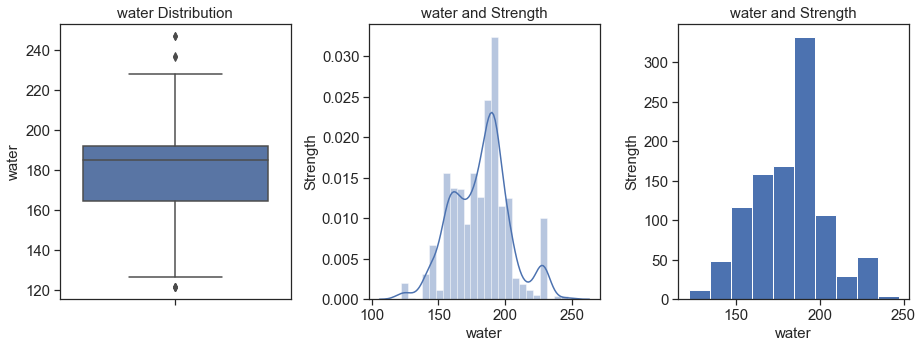

In [16]:
fig, (water1,water2,water3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='water',data=concrete,orient='v',ax=water1)
water1.set_ylabel('water', fontsize=15)
water1.set_title('water Distribution', fontsize=15)
water1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete['water'],ax=water2)
water2.set_xlabel('water', fontsize=15)
water2.set_ylabel('Strength', fontsize=15)
water2.set_title('water and Strength', fontsize=15)
water2.tick_params(labelsize=15)

#histogram
water3.hist(concrete['water'])
water3.set_xlabel('water', fontsize=15)
water3.set_ylabel('Strength', fontsize=15)
water3.set_title('water and Strength', fontsize=15)
water3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### superplastic

In [17]:
# Central values
print('\n Central values \n')
superplasticmin = concrete['superplastic'].min()
superplasticmax = concrete['superplastic'].max()
superplasticmean = concrete['superplastic'].mean()
superplasticmedian = concrete['superplastic'].median()
superplasticstd = concrete['superplastic'].std()
superplasticrangeval = superplasticmax - superplasticmin
print('superplastic Minimum age: ', superplasticmin)
print('superplastic Maximum age: ',superplasticmax)
print('superplastic Mean value: ', superplasticmean)
print('superplastic Median value: ',superplasticmedian)
print('superplastic Standard deviation: ', superplasticstd)
print('superplastic Range of values: ', superplasticrangeval)

## Quartiles
print('\n Quartiles \n')
superplasticQ1=concrete['superplastic'].quantile(q=0.25)
superplasticQ3=concrete['superplastic'].quantile(q=0.75)
superplasticIqr = stats.iqr(concrete['superplastic'])
print('superplastic 1st Quartile (Q1) is: ', superplasticQ1)
print('superplastic 3st Quartile (Q3) is: ', superplasticQ3)
print('superplastic Interquartile range (IQR) is ', superplasticIqr)

# Outliers
print('\n Outliers \n')
superplasticLoutliers=superplasticQ1-1.5*(superplasticQ3-superplasticQ1)
superplasticUoutliers=superplasticQ3+1.5*(superplasticQ3-superplasticQ1)
print('superplastic Lower Outliers: ', superplasticLoutliers)
print('superplastic Upper Outliers: ', superplasticUoutliers)
print('\nsuperplastic Number of Lower Outliers is: ', concrete[concrete['superplastic']<superplasticLoutliers]['superplastic'].count())
print('superplastic Number of Upper Outliers is: ', concrete[concrete['superplastic']>superplasticUoutliers]['superplastic'].count())
print('\nPercentage of Lower Outlier is: ',round(concrete[concrete['superplastic']<superplasticLoutliers]['superplastic'].count()*100/len(concrete)), '%')
print('Percentage of Upper Outlier is: ',round(concrete[concrete['superplastic']>superplasticUoutliers]['superplastic'].count()*100/len(concrete)), '%')


 Central values 

superplastic Minimum age:  0.0
superplastic Maximum age:  32.2
superplastic Mean value:  6.204660194174756
superplastic Median value:  6.4
superplastic Standard deviation:  5.973841392485508
superplastic Range of values:  32.2

 Quartiles 

superplastic 1st Quartile (Q1) is:  0.0
superplastic 3st Quartile (Q3) is:  10.2
superplastic Interquartile range (IQR) is  10.2

 Outliers 

superplastic Lower Outliers:  -15.299999999999999
superplastic Upper Outliers:  25.5

superplastic Number of Lower Outliers is:  0
superplastic Number of Upper Outliers is:  10

Percentage of Lower Outlier is:  0.0 %
Percentage of Upper Outlier is:  1.0 %


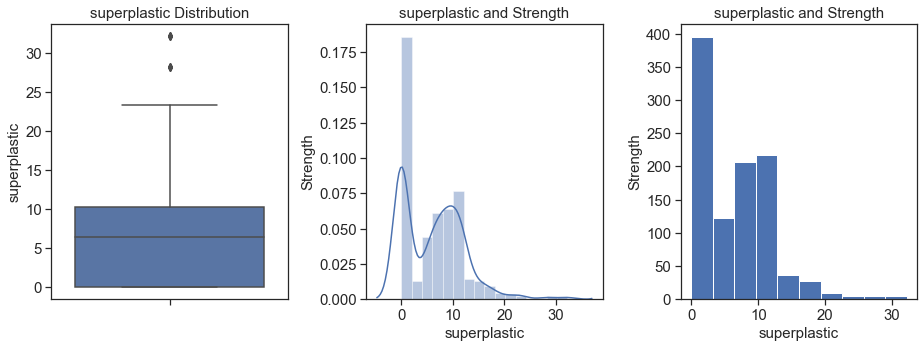

In [18]:
fig, (superplastic1,superplastic2,superplastic3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='superplastic',data=concrete,orient='v',ax=superplastic1)
superplastic1.set_ylabel('superplastic', fontsize=15)
superplastic1.set_title('superplastic Distribution', fontsize=15)
superplastic1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete['superplastic'],ax=superplastic2)
superplastic2.set_xlabel('superplastic', fontsize=15)
superplastic2.set_ylabel('Strength', fontsize=15)
superplastic2.set_title('superplastic and Strength', fontsize=15)
superplastic2.tick_params(labelsize=15)

#histogram
superplastic3.hist(concrete['superplastic'])
superplastic3.set_xlabel('superplastic', fontsize=15)
superplastic3.set_ylabel('Strength', fontsize=15)
superplastic3.set_title('superplastic and Strength', fontsize=15)
superplastic3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### coarseagg

In [19]:
# Central values
print('\n Central values \n')
coarseaggmin = concrete['coarseagg'].min()
coarseaggmax = concrete['coarseagg'].max()
coarseaggmean = concrete['coarseagg'].mean()
coarseaggmedian = concrete['coarseagg'].median()
coarseaggstd = concrete['coarseagg'].std()
coarseaggrangeval = coarseaggmax - coarseaggmin
print('coarseagg Minimum age: ', coarseaggmin)
print('coarseagg Maximum age: ',coarseaggmax)
print('coarseagg Mean value: ', coarseaggmean)
print('coarseagg Median value: ',coarseaggmedian)
print('coarseagg Standard deviation: ', coarseaggstd)
print('coarseagg Range of values: ', coarseaggrangeval)

## Quartiles
print('\n Quartiles \n')
coarseaggQ1=concrete['coarseagg'].quantile(q=0.25)
coarseaggQ3=concrete['coarseagg'].quantile(q=0.75)
coarseaggIqr = stats.iqr(concrete['coarseagg'])
print('coarseagg 1st Quartile (Q1) is: ', coarseaggQ1)
print('coarseagg 3st Quartile (Q3) is: ', coarseaggQ3)
print('coarseagg Interquartile range (IQR) is ', coarseaggIqr)

# Outliers
print('\n Outliers \n')
coarseaggLoutliers=coarseaggQ1-1.5*(coarseaggQ3-coarseaggQ1)
coarseaggUoutliers=coarseaggQ3+1.5*(coarseaggQ3-coarseaggQ1)
print('coarseagg Lower Outliers: ', coarseaggLoutliers)
print('coarseagg Upper Outliers: ', coarseaggUoutliers)
print('\ncoarseagg Number of Lower Outliers is: ', concrete[concrete['coarseagg']<coarseaggLoutliers]['coarseagg'].count())
print('coarseagg Number of Upper Outliers is: ', concrete[concrete['coarseagg']>coarseaggUoutliers]['coarseagg'].count())
print('\nPercentage of Lower Outlier is: ',round(concrete[concrete['coarseagg']<coarseaggLoutliers]['coarseagg'].count()*100/len(concrete)), '%')
print('Percentage of Upper Outlier is: ',round(concrete[concrete['coarseagg']>coarseaggUoutliers]['coarseagg'].count()*100/len(concrete)), '%')


 Central values 

coarseagg Minimum age:  801.0
coarseagg Maximum age:  1145.0
coarseagg Mean value:  972.918932038835
coarseagg Median value:  968.0
coarseagg Standard deviation:  77.75395396672087
coarseagg Range of values:  344.0

 Quartiles 

coarseagg 1st Quartile (Q1) is:  932.0
coarseagg 3st Quartile (Q3) is:  1029.4
coarseagg Interquartile range (IQR) is  97.40000000000009

 Outliers 

coarseagg Lower Outliers:  785.8999999999999
coarseagg Upper Outliers:  1175.5000000000002

coarseagg Number of Lower Outliers is:  0
coarseagg Number of Upper Outliers is:  0

Percentage of Lower Outlier is:  0.0 %
Percentage of Upper Outlier is:  0.0 %


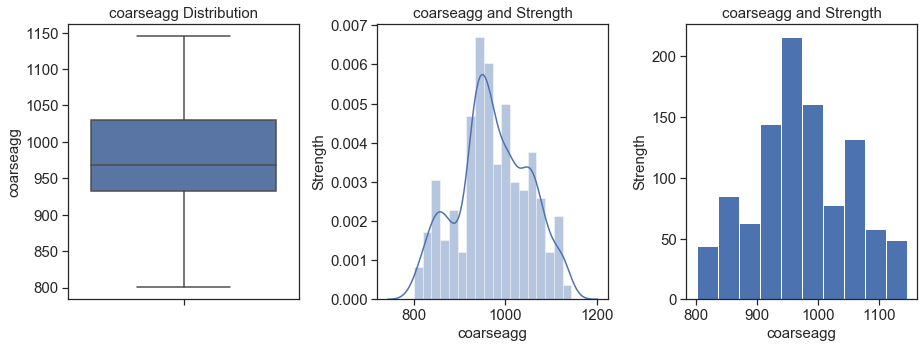

In [20]:
fig, (coarseagg1,coarseagg2,coarseagg3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='coarseagg',data=concrete,orient='v',ax=coarseagg1)
coarseagg1.set_ylabel('coarseagg', fontsize=15)
coarseagg1.set_title('coarseagg Distribution', fontsize=15)
coarseagg1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete['coarseagg'],ax=coarseagg2)
coarseagg2.set_xlabel('coarseagg', fontsize=15)
coarseagg2.set_ylabel('Strength', fontsize=15)
coarseagg2.set_title('coarseagg and Strength', fontsize=15)
coarseagg2.tick_params(labelsize=15)

#histogram
coarseagg3.hist(concrete['coarseagg'])
coarseagg3.set_xlabel('coarseagg', fontsize=15)
coarseagg3.set_ylabel('Strength', fontsize=15)
coarseagg3.set_title('coarseagg and Strength', fontsize=15)
coarseagg3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### fineagg

In [21]:
# Central values
print('\n Central values \n')
fineaggmin = concrete['fineagg'].min()
fineaggmax = concrete['fineagg'].max()
fineaggmean = concrete['fineagg'].mean()
fineaggmedian = concrete['fineagg'].median()
fineaggstd = concrete['fineagg'].std()
fineaggrangeval = fineaggmax - fineaggmin
print('fineagg Minimum age: ', fineaggmin)
print('fineagg Maximum age: ',fineaggmax)
print('fineagg Mean value: ', fineaggmean)
print('fineagg Median value: ',fineaggmedian)
print('fineagg Standard deviation: ', fineaggstd)
print('fineagg Range of values: ', fineaggrangeval)

## Quartiles
print('\n Quartiles \n')
fineaggQ1=concrete['fineagg'].quantile(q=0.25)
fineaggQ3=concrete['fineagg'].quantile(q=0.75)
fineaggIqr = stats.iqr(concrete['fineagg'])
print('fineagg 1st Quartile (Q1) is: ', fineaggQ1)
print('fineagg 3st Quartile (Q3) is: ', fineaggQ3)
print('fineagg Interquartile range (IQR) is ', fineaggIqr)

# Outliers
print('\n Outliers \n')
fineaggLoutliers=fineaggQ1-1.5*(fineaggQ3-fineaggQ1)
fineaggUoutliers=fineaggQ3+1.5*(fineaggQ3-fineaggQ1)
print('fineagg Lower Outliers: ', fineaggLoutliers)
print('fineagg Upper Outliers: ', fineaggUoutliers)
print('\nfineagg Number of Lower Outliers is: ', concrete[concrete['fineagg']<fineaggLoutliers]['fineagg'].count())
print('fineagg Number of Upper Outliers is: ', concrete[concrete['fineagg']>fineaggUoutliers]['fineagg'].count())
print('\nPercentage of Lower Outlier is: ',round(concrete[concrete['fineagg']<fineaggLoutliers]['fineagg'].count()*100/len(concrete)), '%')
print('Percentage of Upper Outlier is: ',round(concrete[concrete['fineagg']>fineaggUoutliers]['fineagg'].count()*100/len(concrete)), '%')


 Central values 

fineagg Minimum age:  594.0
fineagg Maximum age:  992.6
fineagg Mean value:  773.5804854368932
fineagg Median value:  779.5
fineagg Standard deviation:  80.17598014240443
fineagg Range of values:  398.6

 Quartiles 

fineagg 1st Quartile (Q1) is:  730.9499999999999
fineagg 3st Quartile (Q3) is:  824.0
fineagg Interquartile range (IQR) is  93.05000000000007

 Outliers 

fineagg Lower Outliers:  591.3749999999998
fineagg Upper Outliers:  963.575

fineagg Number of Lower Outliers is:  0
fineagg Number of Upper Outliers is:  5

Percentage of Lower Outlier is:  0.0 %
Percentage of Upper Outlier is:  0.0 %


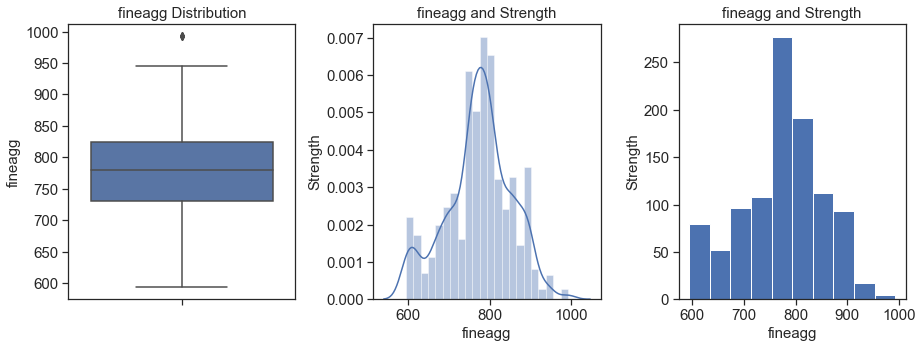

In [22]:
fig, (fineagg1,fineagg2,fineagg3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fineagg',data=concrete,orient='v',ax=fineagg1)
fineagg1.set_ylabel('fineagg', fontsize=15)
fineagg1.set_title('fineagg Distribution', fontsize=15)
fineagg1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete['fineagg'],ax=fineagg2)
fineagg2.set_xlabel('fineagg', fontsize=15)
fineagg2.set_ylabel('Strength', fontsize=15)
fineagg2.set_title('fineagg and Strength', fontsize=15)
fineagg2.tick_params(labelsize=15)

#histogram
fineagg3.hist(concrete['fineagg'])
fineagg3.set_xlabel('fineagg', fontsize=15)
fineagg3.set_ylabel('Strength', fontsize=15)
fineagg3.set_title('fineagg and Strength', fontsize=15)
fineagg3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### age

In [23]:
# Central values
print('\n Central values \n')
agemin = concrete['age'].min()
agemax = concrete['age'].max()
agemean = concrete['age'].mean()
agemedian = concrete['age'].median()
agestd = concrete['age'].std()
agerangeval = agemax - agemin
print('age Minimum age: ', agemin)
print('age Maximum age: ',agemax)
print('age Mean value: ', agemean)
print('age Median value: ',agemedian)
print('age Standard deviation: ', agestd)
print('age Range of values: ', agerangeval)

## Quartiles
print('\n Quartiles \n')
ageQ1=concrete['age'].quantile(q=0.25)
ageQ3=concrete['age'].quantile(q=0.75)
ageIqr = stats.iqr(concrete['age'])
print('age 1st Quartile (Q1) is: ', ageQ1)
print('age 3st Quartile (Q3) is: ', ageQ3)
print('age Interquartile range (IQR) is ', ageIqr)

# Outliers
print('\n Outliers \n')
ageLoutliers=ageQ1-1.5*(ageQ3-ageQ1)
ageUoutliers=ageQ3+1.5*(ageQ3-ageQ1)
print('age Lower Outliers: ', ageLoutliers)
print('age Upper Outliers: ', ageUoutliers)
print('\nage Number of Lower Outliers is: ', concrete[concrete['age']<ageLoutliers]['age'].count())
print('age Number of Upper Outliers is: ', concrete[concrete['age']>ageUoutliers]['age'].count())
print('\nPercentage of Lower Outlier is: ',round(concrete[concrete['age']<ageLoutliers]['age'].count()*100/len(concrete)), '%')
print('Percentage of Upper Outlier is: ',round(concrete[concrete['age']>ageUoutliers]['age'].count()*100/len(concrete)), '%')


 Central values 

age Minimum age:  1
age Maximum age:  365
age Mean value:  45.662135922330094
age Median value:  28.0
age Standard deviation:  63.16991158103279
age Range of values:  364

 Quartiles 

age 1st Quartile (Q1) is:  7.0
age 3st Quartile (Q3) is:  56.0
age Interquartile range (IQR) is  49.0

 Outliers 

age Lower Outliers:  -66.5
age Upper Outliers:  129.5

age Number of Lower Outliers is:  0
age Number of Upper Outliers is:  59

Percentage of Lower Outlier is:  0.0 %
Percentage of Upper Outlier is:  6.0 %


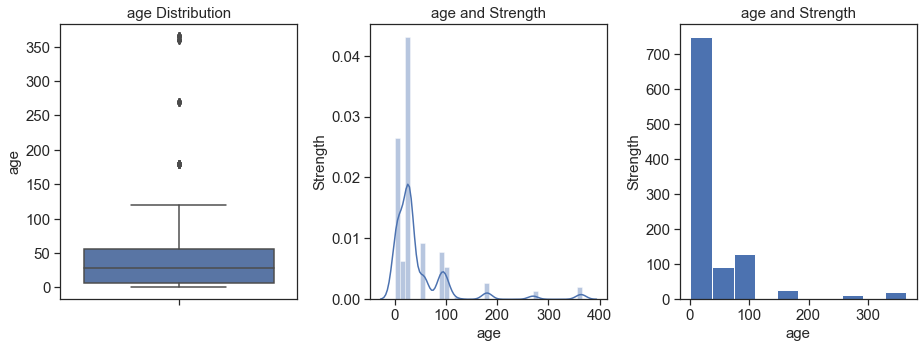

In [24]:
fig, (age1,age2,age3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=concrete,orient='v',ax=age1)
age1.set_ylabel('age', fontsize=15)
age1.set_title('age Distribution', fontsize=15)
age1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete['age'],ax=age2)
age2.set_xlabel('age', fontsize=15)
age2.set_ylabel('Strength', fontsize=15)
age2.set_title('age and Strength', fontsize=15)
age2.tick_params(labelsize=15)

#histogram
age3.hist(concrete['age'])
age3.set_xlabel('age', fontsize=15)
age3.set_ylabel('Strength', fontsize=15)
age3.set_title('age and Strength', fontsize=15)
age3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

## b - Multivariate analysis

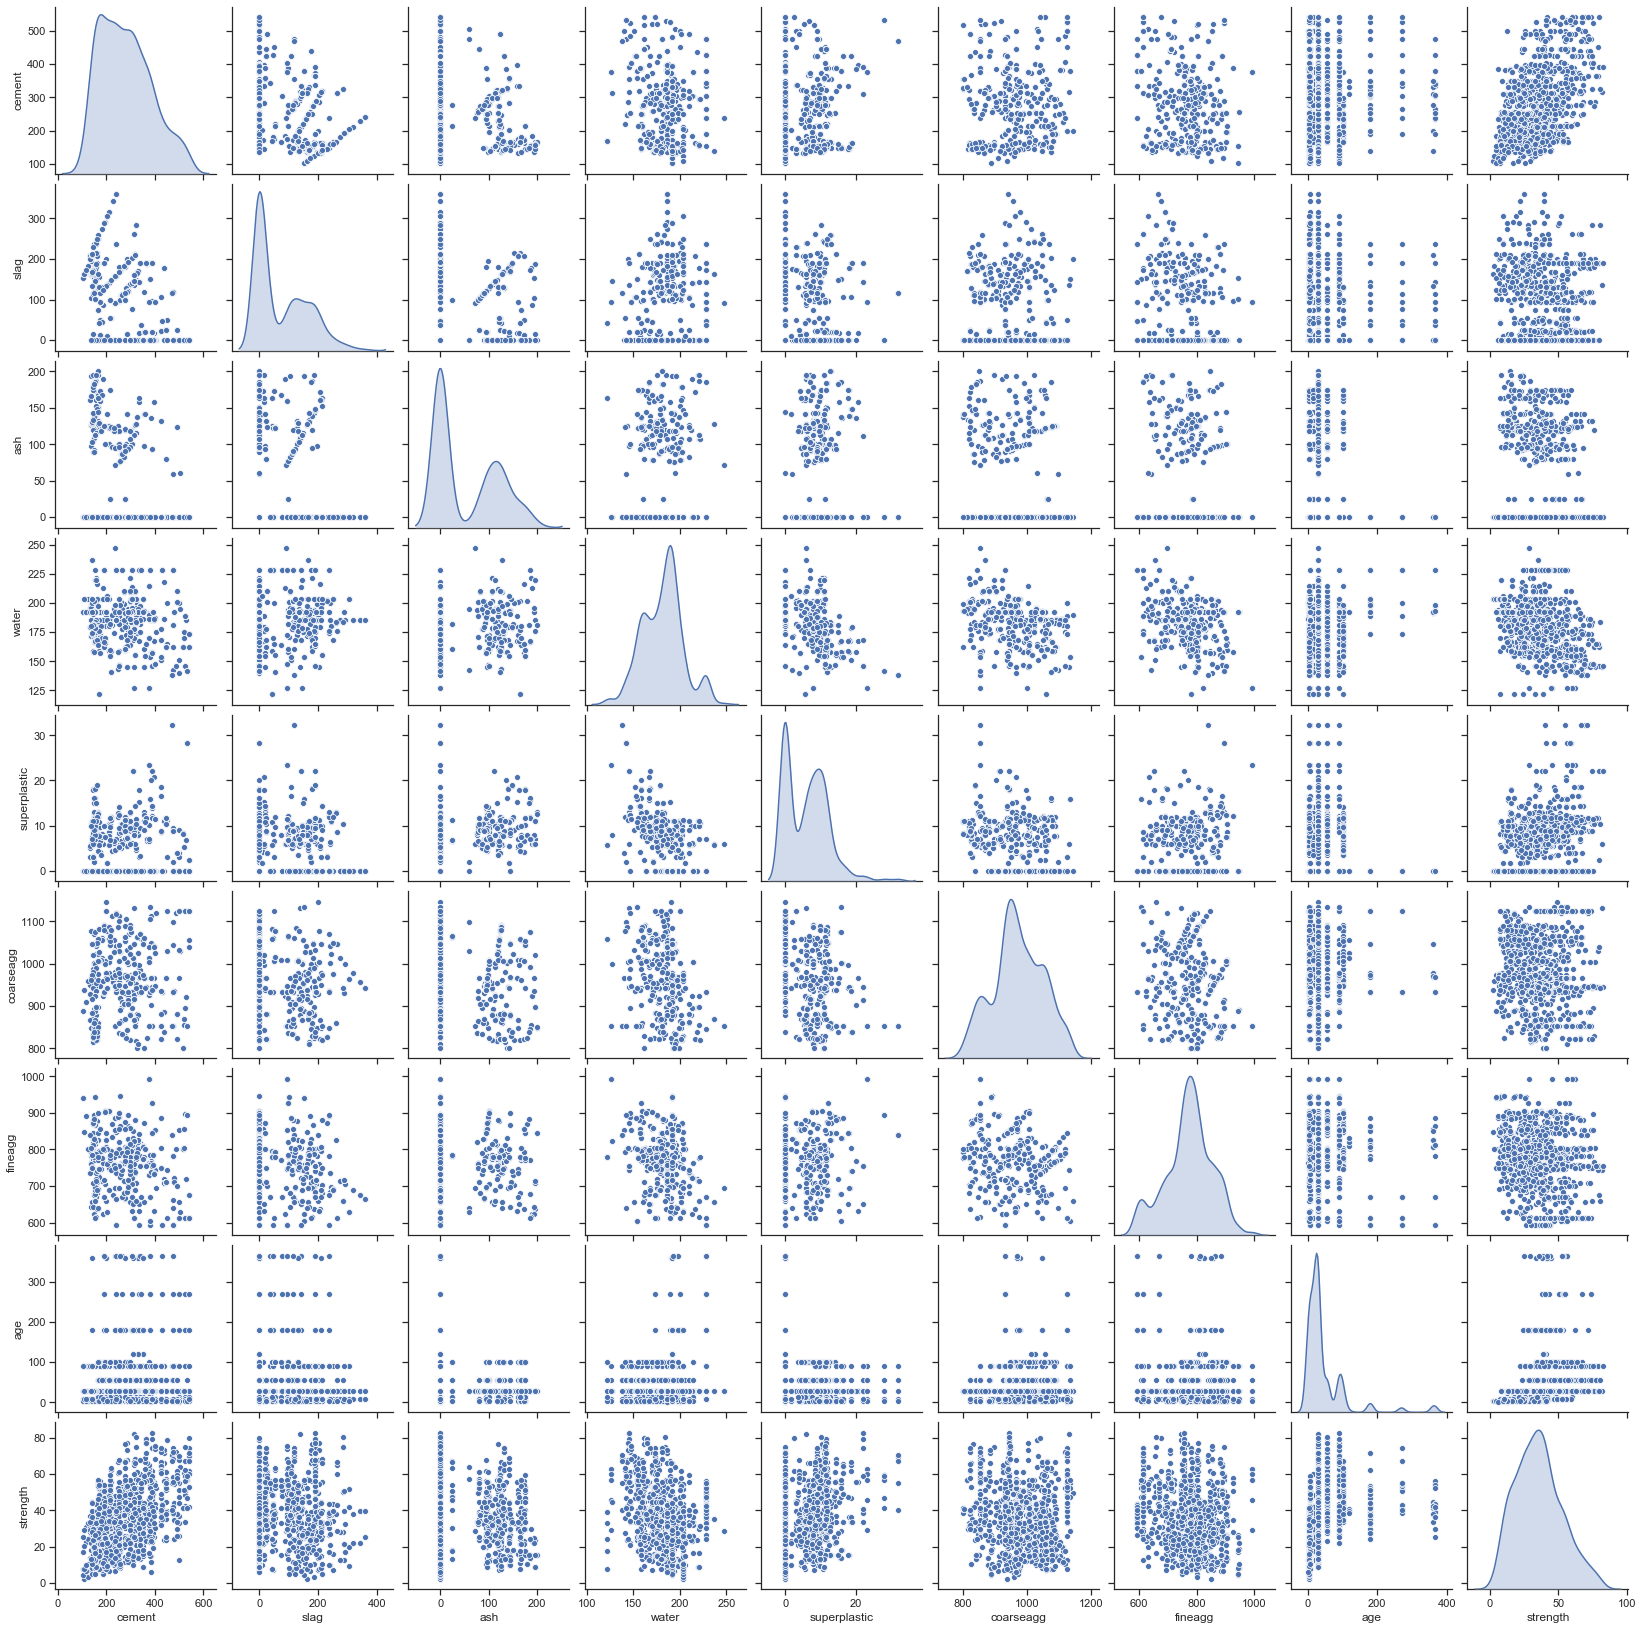

In [25]:
sns.pairplot(concrete, diag_kind='kde')

In [26]:
# corrlation matrix 
corr = concrete.corr()
corr

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water        -0.450661  0.277618 -0.289633  
superplastic  0.222691 -0.192700  0.366079  
coarseagg    -0.178481 -0.003016 -0.164935  
fineagg       1.000000 -0.156095 -0.167241  
age          -0.156095  1.000000  0.328873  
strength     -0.167241  0.328873  1.000000

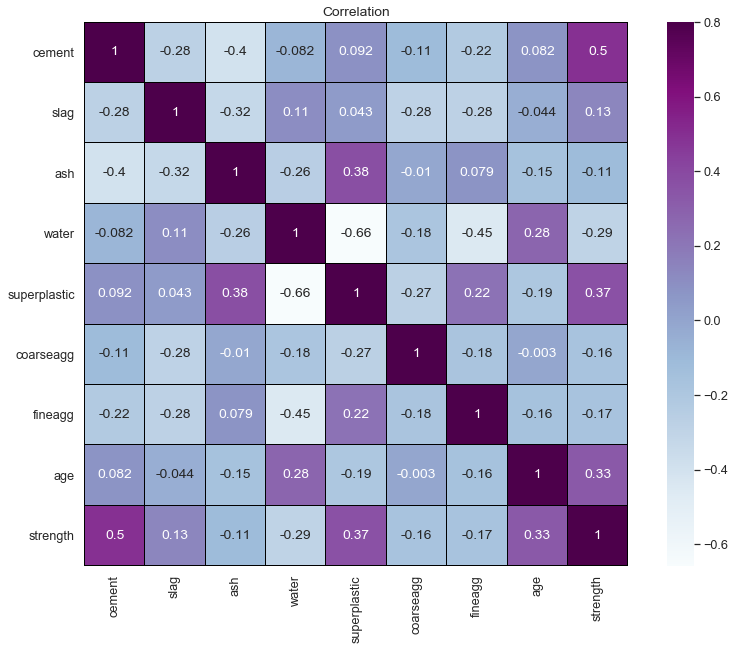

In [27]:
#heatmap
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")
plt.title('Correlation');

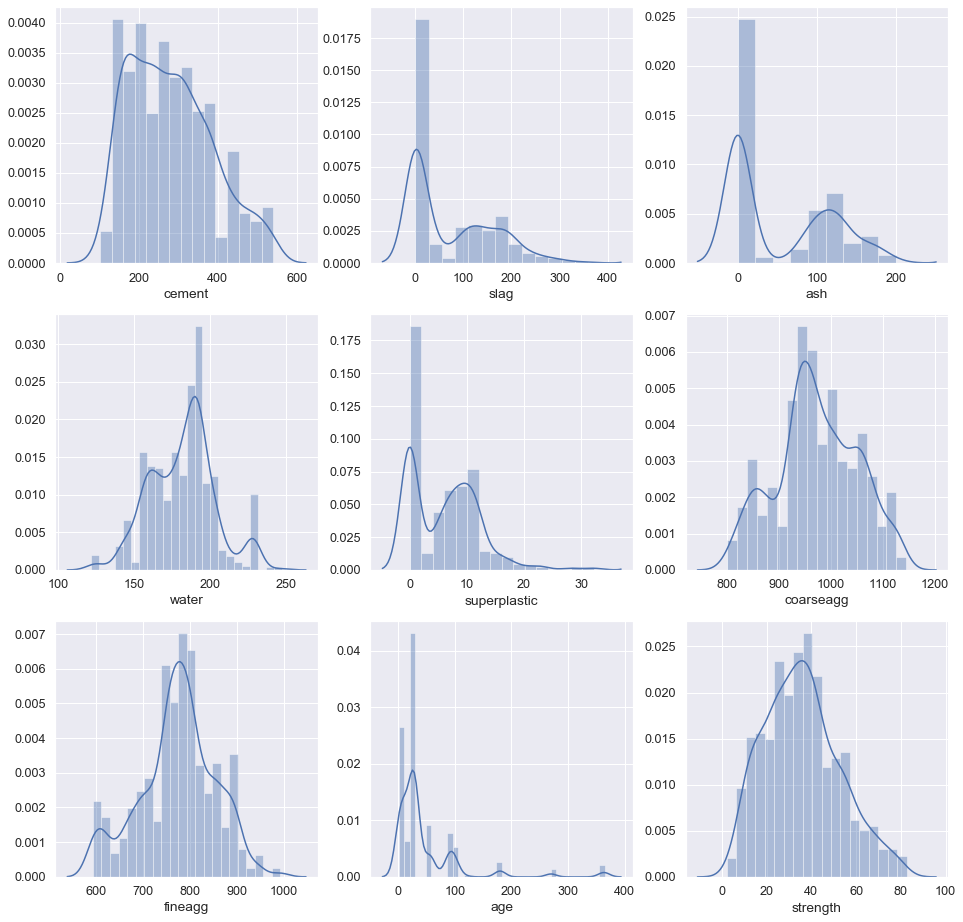

In [28]:
# Distplot
fig, plt1 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(concrete['cement'],ax=plt1[0][0])
sns.distplot(concrete['slag'],ax=plt1[0][1])
sns.distplot(concrete['ash'],ax=plt1[0][2])
sns.distplot(concrete['water'],ax=plt1[1][0])
sns.distplot(concrete['superplastic'],ax=plt1[1][1])
sns.distplot(concrete['coarseagg'],ax=plt1[1][2])
sns.distplot(concrete['fineagg'],ax=plt1[2][0])
sns.distplot(concrete['age'],ax=plt1[2][1])
sns.distplot(concrete['strength'],ax=plt1[2][2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C751C359C8>,
      dtype=object)

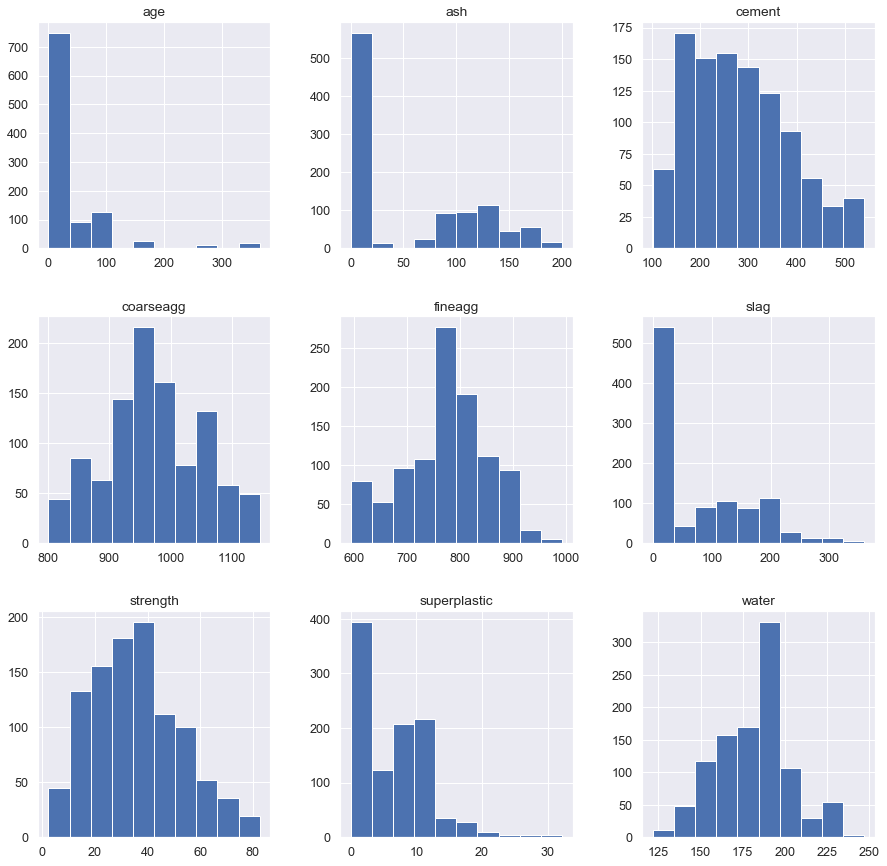

In [29]:
# Histogram 
concrete.hist(figsize=(15,15))

### Obeserbation is
- cement is almost normal.
- slag has three gausssians and rightly skewed.
- ash has two gaussians and rightly skewed.
- water has three guassians and slighly left skewed.
- superplastic has two gaussians and rightly skewed.
- coarseagg has three guassians and almost normal.
- fineagg has almost two guassians and looks like normal.
- age has multiple guassians and rightly skewed.
- strength is close to a normal curve.
- water shows some negative relationship with superplastic and fineagg. but also shows some kind of positive relationship with slag and age

### Outcome
- none of the independent attributes are a good predictors of the strength attribute

## c - Perform Necessary Imputation

### Finding Outliers

Using Standard deviation more than 3 points which can be count as Outlier

In [30]:
cementsdev = concrete[((concrete.cement - concrete.cement.mean()) / concrete.cement.std()).abs() >3]['cement']
slagsdev = concrete[((concrete.slag - concrete.slag.mean()) / concrete.slag.std()).abs() >3]['slag']
ashsdev = concrete[((concrete.ash - concrete.ash.mean()) / concrete.ash.std()).abs() >3]['ash']
watersdev = concrete[((concrete.water - concrete.water.mean()) / concrete.water.std()).abs() >3]['water']
superplasticsdev = concrete[((concrete.superplastic - concrete.superplastic.mean()) / concrete.superplastic.std()).abs() >3]['superplastic']
coarseaggsdev = concrete[((concrete.coarseagg - concrete.coarseagg.mean()) / concrete.coarseagg.std()).abs() >3]['coarseagg']
fineaggsdev = concrete[((concrete.fineagg - concrete.fineagg.mean()) / concrete.fineagg.std()).abs() >3]['fineagg']
agesdev = concrete[((concrete.age - concrete.age.mean()) / concrete.age.std()).abs() >3]['age']

print('cement count of outliers: ', cementsdev.count())
print('slag count of outliers: ', slagsdev.count())
print('ash count of outliers: ', ashsdev.count())
print('water count of outliers: ', watersdev.count())
print('superplastic count of outliers: ', superplasticsdev.count())
print('coarseagg count of outliers: ', coarseaggsdev.count())
print('fineagg count of outliers: ', fineaggsdev.count())
print('age count of outliers: ', agesdev.count())

cement count of outliers:  0
slag count of outliers:  4
ash count of outliers:  0
water count of outliers:  2
superplastic count of outliers:  10
coarseagg count of outliers:  0
fineagg count of outliers:  0
age count of outliers:  33


- slag, water, superplastic and age has outliers

In [31]:
# Create Copy of Data File
concrete1=concrete.copy()

In [32]:
# Replace outliers by median
for col_name in concrete1.columns[:-1]:
    q1 = concrete1[col_name].quantile(0.25)
    q3 = concrete1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete1.loc[(concrete1[col_name] < low) | (concrete1[col_name] > high), col_name] = concrete1[col_name].median()

In [33]:
cementsdev1 = concrete1[((concrete1.cement - concrete1.cement.mean()) / concrete1.cement.std()).abs() >3]['cement']
slagsdev1 = concrete1[((concrete1.slag - concrete1.slag.mean()) / concrete1.slag.std()).abs() >3]['slag']
ashsdev1 = concrete1[((concrete1.ash - concrete1.ash.mean()) / concrete1.ash.std()).abs() >3]['ash']
watersdev1 = concrete1[((concrete1.water - concrete1.water.mean()) / concrete1.water.std()).abs() >3]['water']
superplasticsdev1 = concrete1[((concrete1.superplastic - concrete1.superplastic.mean()) / concrete1.superplastic.std()).abs() >3]['superplastic']
coarseaggsdev1 = concrete1[((concrete1.coarseagg - concrete1.coarseagg.mean()) / concrete1.coarseagg.std()).abs() >3]['coarseagg']
fineaggsdev1 = concrete1[((concrete1.fineagg - concrete1.fineagg.mean()) / concrete1.fineagg.std()).abs() >3]['fineagg']
agesdev1 = concrete1[((concrete1.age - concrete1.age.mean()) / concrete1.age.std()).abs() >3]['age']

print('cement count of outliers: ', cementsdev1.count())
print('slag count of outliers: ', slagsdev1.count())
print('ash count of outliers: ', ashsdev1.count())
print('water count of outliers: ', watersdev1.count())
print('superplastic count of outliers: ', superplasticsdev1.count())
print('coarseagg count of outliers: ', coarseaggsdev1.count())
print('fineagg count of outliers: ', fineaggsdev1.count())
print('age count of outliers: ', agesdev1.count())

cement count of outliers:  0
slag count of outliers:  2
ash count of outliers:  0
water count of outliers:  0
superplastic count of outliers:  5
coarseagg count of outliers:  0
fineagg count of outliers:  0
age count of outliers:  3


### Scaling data

In [34]:
concrete_z = concrete1.apply(zscore)
concrete_z = pd.DataFrame(concrete_z,columns=concrete.columns)

### Spliting Data

In [35]:
X = concrete_z.iloc[:,0:8]
y = concrete_z.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 3)

### Decision Tree Regression

In [36]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [37]:
#printing the feature importance
print('Feature importances')
imp = pd.DataFrame(dt_model.feature_importances_,columns=['imp'],index=X_train.columns)
imp

Feature importances


imp
cement        0.365779
slag          0.089074
ash           0.013840
water         0.101783
superplastic  0.028540
coarseagg     0.019491
fineagg       0.031595
age           0.349898

- cement, age and water are significant 

In [38]:
score = ''

In [39]:
y_pred = dt_model.predict(X_test)
train_dt = dt_model.score(X_train,y_train)
test_dt = dt_model.score(X_test,y_test)
acc_dt = metrics.r2_score(y_test, y_pred)

print('Decision Tree Performance on training:', train_dt)
print('Decision Tree Performance on testing:', test_dt)
print('Decision Tree Accuracy: ', acc_dt)

Decision Tree Performance on training: 0.9927819002455989
Decision Tree Performance on testing: 0.8072323054473127
Decision Tree Accuracy:  0.8072323054473127


In [40]:
## Score Table
score = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': acc_dt, 'Remarks': 'OverFit'},index={'1'})
score = score[['Method', 'Accuracy', 'Remarks']]
score

Method  Accuracy  Remarks
1  Decision Tree  0.807232  OverFit

### K fold cross validation

In [41]:
num_folds = 11
seed = 73
kfold = KFold(n_splits=num_folds, random_state=seed)
result_kf = cross_val_score(dt_model,X, y, cv=kfold)
acc_kf = np.mean(abs(result_kf))
print('K fold accuracy: ', acc_kf)
print('K fold  Standard Deviation: ',result_kf.std())

K fold accuracy:  0.8647127698157097
K fold  Standard Deviation:  0.03616607369322397


In [42]:
tempscore = pd.DataFrame({'Method':['Decision Tree Kfold'], 'Accuracy': [acc_kf], 'Remarks': 'OverFit'},index={'2'})
score = pd.concat([score, tempscore])
score

Method  Accuracy  Remarks
1        Decision Tree  0.807232  OverFit
2  Decision Tree Kfold  0.864713  OverFit

- ash,coarseagg and fineagg are least significant variable.

### Drop the least significant Values

In [43]:
#Create a copy of the dataset
concrete2 = concrete_z.copy()

In [44]:
X = concrete2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete2['strength']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [45]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
#printing the feature importance
print('Feature importances')
imp = pd.DataFrame(dt_model.feature_importances_,columns=['imp'],index=X_train.columns)
imp

Feature importances


imp
cement        0.367526
slag          0.107849
water         0.162876
superplastic  0.032804
age           0.328945

In [47]:
y_pred = dt_model.predict(X_test)
train_dt = dt_model.score(X_train,y_train)
test_dt = dt_model.score(X_test,y_test)
acc_dt2 = metrics.r2_score(y_test, y_pred)

print('Decision Tree Performance on training:', train_dt)
print('Decision Tree Performance on testing:', test_dt)
print('Decision Tree Accuracy: ', acc_dt2)

Decision Tree Performance on training: 0.991045963372976
Decision Tree Performance on testing: 0.8512159278789552
Decision Tree Accuracy:  0.8512159278789553


In [48]:
tempscore = pd.DataFrame({'Method':['Decision Tree Drop Values'], 'Accuracy': [acc_dt2], 'Remarks': 'OverFit'},index={'3'})
score = pd.concat([score, tempscore])
score

Method  Accuracy  Remarks
1              Decision Tree  0.807232  OverFit
2        Decision Tree Kfold  0.864713  OverFit
3  Decision Tree Drop Values  0.851216  OverFit

### Pruned Decision Tree

In [49]:
X = concrete_z.iloc[:,0:8]
y = concrete_z.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 3)

In [50]:
reg_dt_model = DecisionTreeRegressor( max_depth = 4, random_state=1, min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [51]:
regdt = pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns)
regdt

Imp
cement        0.417754
slag          0.037360
ash           0.000000
water         0.104917
superplastic  0.016153
coarseagg     0.000000
fineagg       0.009909
age           0.413906

In [52]:
y_pred = reg_dt_model.predict(X_test)
acc_rdt=metrics.r2_score(y_test, y_pred)
print('Performance on training:', reg_dt_model.score(X_train,y_train) )
print('Performance on testing:', reg_dt_model.score(X_test,y_test))
print('Accuracy: ', acc_rdt)

Performance on training: 0.7529135145745696
Performance on testing: 0.6607379901911274
Accuracy:  0.6607379901911274


In [53]:
tempscore = pd.DataFrame({'Method':['Pruned Decision Tree'], 'Accuracy': [acc_rdt], 'Remarks': 'Traning .75'},index={'4'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1              Decision Tree  0.807232      OverFit
2        Decision Tree Kfold  0.864713      OverFit
3  Decision Tree Drop Values  0.851216      OverFit
4       Pruned Decision Tree  0.660738  Traning .75

In [54]:
num_folds = 11
seed = 73
kfold = KFold(n_splits=num_folds, random_state=seed)
result_kfp = cross_val_score(reg_dt_model,X, y, cv=kfold)
acc_kfp = np.mean(abs(result_kf))
print('K fold accuracy: ',acc_kfp)
print('K fold  Standard Deviation: ',result_kfp.std())

K fold accuracy:  0.8647127698157097
K fold  Standard Deviation:  0.056564850224363535


In [55]:
tempscore = pd.DataFrame({'Method':['Pruned K Fold'], 'Accuracy': [acc_kfp], 'Remarks': ''},index={'5'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1              Decision Tree  0.807232      OverFit
2        Decision Tree Kfold  0.864713      OverFit
3  Decision Tree Drop Values  0.851216      OverFit
4       Pruned Decision Tree  0.660738  Traning .75
5              Pruned K Fold  0.864713

In [56]:
concrete3=concrete_z.copy()

In [57]:
X = concrete3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete3['strength']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 7)

In [58]:
reg_dt_model = DecisionTreeRegressor( max_depth = 4, random_state=1, min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [59]:
y_pred = reg_dt_model.predict(X_test)
acc_rdt2 = metrics.r2_score(y_test, y_pred)
print('Performance on training:', reg_dt_model.score(X_train,y_train) )
print('Performance on testing:', reg_dt_model.score(X_test,y_test))
print('Accuracy: ', acc_rdt2)

Performance on training: 0.7427687109179415
Performance on testing: 0.6630346373964373
Accuracy:  0.6630346373964373


In [60]:
tempscore = pd.DataFrame({'Method':['Pruned DT 2'], 'Accuracy': [acc_rdt2], 'Remarks': 'Traning 74'},index={'6'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1              Decision Tree  0.807232      OverFit
2        Decision Tree Kfold  0.864713      OverFit
3  Decision Tree Drop Values  0.851216      OverFit
4       Pruned Decision Tree  0.660738  Traning .75
5              Pruned K Fold  0.864713             
6                Pruned DT 2  0.663035   Traning 74

### K Means Clustering

In [61]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete1)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              1    3.709976e+07
1              2    2.774842e+07
2              3    2.141025e+07
3              4    1.868905e+07
4              5    1.659037e+07
5              6    1.511789e+07
6              7    1.343532e+07
7              8    1.242127e+07
8              9    1.129487e+07
9             10    1.054048e+07
10            11    9.957259e+06
11            12    9.043610e+06
12            13    8.543898e+06
13            14    8.166998e+06

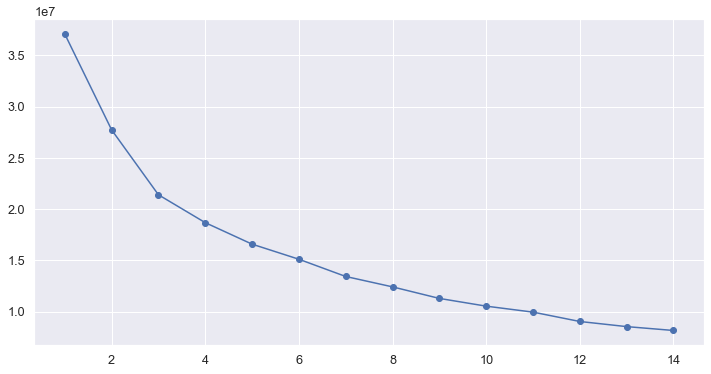

In [62]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [63]:
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(concrete_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [64]:
prediction=cluster.predict(concrete_z)
concrete_z["GROUP"] = prediction     
concrete_z_copy = concrete_z.copy(deep = True) 

In [65]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.42968733, -0.43116456, -0.69660733,  1.29402011, -1.00250124,
         0.18767725, -1.65637577,  0.15492823,  0.69946106],
       [-0.60240291, -0.65738879,  1.10652155, -0.60849218,  0.48891967,
         0.62375972,  0.43280415,  0.27008693, -0.14052292],
       [-0.52847035,  0.25047012,  1.10117943,  0.4707871 ,  0.51065443,
        -1.14464266, -0.34207299, -0.2243148 , -0.27815339],
       [ 0.3359461 , -0.856736  , -0.79663152,  0.45094694, -1.02387881,
         0.49051055,  0.41391665, -0.23081884, -0.67438749],
       [-0.86613968,  1.39500011, -0.83813178,  0.59484847, -0.74216816,
        -0.02114166, -0.16158788, -0.17686571, -0.57203728],
       [ 1.00454194,  0.50203623, -0.51368191, -1.01583295,  1.02698603,
        -0.6014763 ,  0.15987254,  0.07455196,  1.1935206 ]])

In [66]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete1) )
centroid_df

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0  1.429687 -0.431165 -0.696607  1.294020     -1.002501   0.187677 -1.656376   
1 -0.602403 -0.657389  1.106522 -0.608492      0.488920   0.623760  0.432804   
2 -0.528470  0.250470  1.101179  0.470787      0.510654  -1.144643 -0.342073   
3  0.335946 -0.856736 -0.796632  0.450947     -1.023879   0.490511  0.413917   
4 -0.866140  1.395000 -0.838132  0.594848     -0.742168  -0.021142 -0.161588   
5  1.004542  0.502036 -0.513682 -1.015833      1.026986  -0.601476  0.159873   

        age  strength  
0  0.154928  0.699461  
1  0.270087 -0.140523  
2 -0.224315 -0.278153  
3 -0.230819 -0.674387  
4 -0.176866 -0.572037  
5  0.074552  1.193521

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C751F62388>,
      dtype=object)

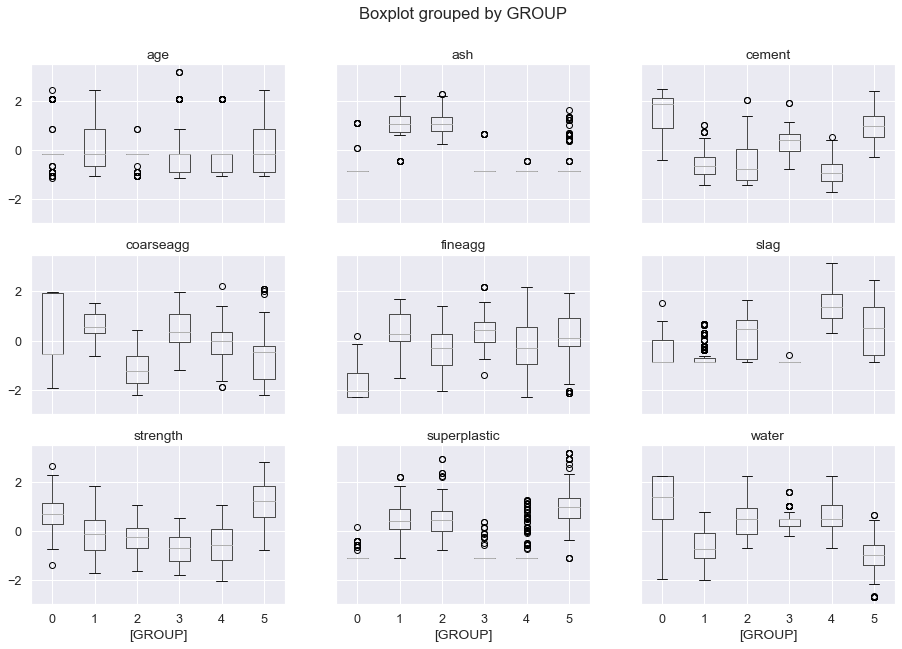

In [67]:
concrete_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

- No dimensions are good predictor of target variable

In [68]:
X = concrete_z.iloc[:,0:8]
y = concrete_z.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 3)

### Random Forest Regressor

In [69]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [70]:
y_pred = rfr_model.predict(X_test)
acc_rfr = metrics.r2_score(y_test, y_pred)
print('Performance on training:', rfr_model.score(X_train,y_train) )
print('Performance on testing:', rfr_model.score(X_test,y_test))
print('Accuracy: ', acc_rfr)

Performance on training: 0.9810733613799876
Performance on testing: 0.874560254896046
Accuracy:  0.874560254896046


- This model is Over Fit

In [71]:
tempscore = pd.DataFrame({'Method':['Random Forest Regressor'], 'Accuracy': [acc_rfr], 'Remarks': 'OverFit'},index={'7'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1              Decision Tree  0.807232      OverFit
2        Decision Tree Kfold  0.864713      OverFit
3  Decision Tree Drop Values  0.851216      OverFit
4       Pruned Decision Tree  0.660738  Traning .75
5              Pruned K Fold  0.864713             
6                Pruned DT 2  0.663035   Traning 74
7    Random Forest Regressor  0.874560      OverFit

In [72]:
num_folds = 11
seed = 73
kfold = KFold(n_splits=num_folds, random_state=seed)
result_kf = cross_val_score(rfr_model,X, y, cv=kfold)
acc_kf=np.mean(abs(result_kf))
print('K fold accuracy: ',acc_kf)
print('K fold  Standard Deviation: ',result_kf.std())

K fold accuracy:  0.9098744713539784
K fold  Standard Deviation:  0.02309196247904854


In [73]:
tempscore = pd.DataFrame({'Method':['RFR Kfold'], 'Accuracy': [acc_kf], 'Remarks': ''},index={'8'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1              Decision Tree  0.807232      OverFit
2        Decision Tree Kfold  0.864713      OverFit
3  Decision Tree Drop Values  0.851216      OverFit
4       Pruned Decision Tree  0.660738  Traning .75
5              Pruned K Fold  0.864713             
6                Pruned DT 2  0.663035   Traning 74
7    Random Forest Regressor  0.874560      OverFit
8                  RFR Kfold  0.909874

### Gradient Boosting Regressor

In [74]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [75]:
y_pred = model.predict(X_test)
acc_gbr = metrics.r2_score(y_test, y_pred)
print('Performance on training:', model.score(X_train,y_train) )
print('Performance on testing:', model.score(X_test,y_test))
print('Accuracy: ', acc_gbr)

Performance on training: 0.9452545814503605
Performance on testing: 0.8885451618281845
Accuracy:  0.8885451618281845


In [76]:
tempscore = pd.DataFrame({'Method':['Gradient Boosting Regressor'], 'Accuracy': [acc_gbr], 'Remarks': 'Traning 94'},index={'9'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1                Decision Tree  0.807232      OverFit
2          Decision Tree Kfold  0.864713      OverFit
3    Decision Tree Drop Values  0.851216      OverFit
4         Pruned Decision Tree  0.660738  Traning .75
5                Pruned K Fold  0.864713             
6                  Pruned DT 2  0.663035   Traning 74
7      Random Forest Regressor  0.874560      OverFit
8                    RFR Kfold  0.909874             
9  Gradient Boosting Regressor  0.888545   Traning 94

In [77]:
num_folds = 11
seed = 73
kfold = KFold(n_splits=num_folds, random_state=seed)
result_kf = cross_val_score(model,X, y, cv=kfold)
acc_gbkf=np.mean(abs(result_kf))
print('K fold accuracy: ',acc_gbkf)
print('K fold  Standard Deviation: ',result_kf.std())

K fold accuracy:  0.897564710362218
K fold  Standard Deviation:  0.02130043719557002


In [78]:
tempscore = pd.DataFrame({'Method':['GBR KFold'], 'Accuracy': [acc_gbkf], 'Remarks': ''},index={'10'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1                 Decision Tree  0.807232      OverFit
2           Decision Tree Kfold  0.864713      OverFit
3     Decision Tree Drop Values  0.851216      OverFit
4          Pruned Decision Tree  0.660738  Traning .75
5                 Pruned K Fold  0.864713             
6                   Pruned DT 2  0.663035   Traning 74
7       Random Forest Regressor  0.874560      OverFit
8                     RFR Kfold  0.909874             
9   Gradient Boosting Regressor  0.888545   Traning 94
10                    GBR KFold  0.897565

### Ada Boosting Regressor

In [79]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [80]:
y_pred = model.predict(X_test)
acc_abr = metrics.r2_score(y_test, y_pred)
print('Performance on training:', model.score(X_train,y_train) )
print('Performance on testing:', model.score(X_test,y_test))
print('Accuracy: ', acc_abr)

Performance on training: 0.8232419713277738
Performance on testing: 0.7577048168344105
Accuracy:  0.7577048168344105


In [81]:
tempscore = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'Accuracy': [acc_abr], 'Remarks': 'Traning 81'},index={'11'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1                 Decision Tree  0.807232      OverFit
2           Decision Tree Kfold  0.864713      OverFit
3     Decision Tree Drop Values  0.851216      OverFit
4          Pruned Decision Tree  0.660738  Traning .75
5                 Pruned K Fold  0.864713             
6                   Pruned DT 2  0.663035   Traning 74
7       Random Forest Regressor  0.874560      OverFit
8                     RFR Kfold  0.909874             
9   Gradient Boosting Regressor  0.888545   Traning 94
10                    GBR KFold  0.897565             
11       Ada Boosting Regressor  0.757705   Traning 81

In [82]:
num_folds = 11
seed = 73
kfold = KFold(n_splits=num_folds, random_state=seed)
result_kf = cross_val_score(model,X, y, cv=kfold)
acc_abkf=np.mean(abs(result_kf))
print('K fold accuracy: ',acc_abkf)
print('K fold  Standard Deviation: ',result_kf.std())

K fold accuracy:  0.7744011351423684
K fold  Standard Deviation:  0.030461879218804506


In [83]:
tempscore = pd.DataFrame({'Method':['Ada BR KFold'], 'Accuracy': [acc_abkf], 'Remarks': ''},index={'12'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1                 Decision Tree  0.807232      OverFit
2           Decision Tree Kfold  0.864713      OverFit
3     Decision Tree Drop Values  0.851216      OverFit
4          Pruned Decision Tree  0.660738  Traning .75
5                 Pruned K Fold  0.864713             
6                   Pruned DT 2  0.663035   Traning 74
7       Random Forest Regressor  0.874560      OverFit
8                     RFR Kfold  0.909874             
9   Gradient Boosting Regressor  0.888545   Traning 94
10                    GBR KFold  0.897565             
11       Ada Boosting Regressor  0.757705   Traning 81
12                 Ada BR KFold  0.774401

### Bagging Regressor

In [84]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [85]:
y_pred = model.predict(X_test)
acc_bar = metrics.r2_score(y_test, y_pred)
print('Performance on training:', model.score(X_train,y_train) )
print('Performance on testing:', model.score(X_test,y_test))
print('Accuracy: ', acc_bar)

Performance on training: 0.9747451504655527
Performance on testing: 0.8668818638660303
Accuracy:  0.8668818638660303


In [86]:
tempscore = pd.DataFrame({'Method':['Bagging Regressor'], 'Accuracy': [acc_bar], 'Remarks': 'Traning 97'},index={'13'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1                 Decision Tree  0.807232      OverFit
2           Decision Tree Kfold  0.864713      OverFit
3     Decision Tree Drop Values  0.851216      OverFit
4          Pruned Decision Tree  0.660738  Traning .75
5                 Pruned K Fold  0.864713             
6                   Pruned DT 2  0.663035   Traning 74
7       Random Forest Regressor  0.874560      OverFit
8                     RFR Kfold  0.909874             
9   Gradient Boosting Regressor  0.888545   Traning 94
10                    GBR KFold  0.897565             
11       Ada Boosting Regressor  0.757705   Traning 81
12                 Ada BR KFold  0.774401             
13            Bagging Regressor  0.866882   Traning 97

In [87]:
num_folds = 11
seed = 73
kfold = KFold(n_splits=num_folds, random_state=seed)
result_kf = cross_val_score(model,X, y, cv=kfold)
acc_barkf=np.mean(abs(result_kf))
print('K fold accuracy: ',acc_barkf)
print('K fold  Standard Deviation: ',result_kf.std())

K fold accuracy:  0.9054025279058601
K fold  Standard Deviation:  0.0212835556394534


In [88]:
tempscore = pd.DataFrame({'Method':['Bagging Regressor KFold'], 'Accuracy': [acc_barkf], 'Remarks': ''},index={'14'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1                 Decision Tree  0.807232      OverFit
2           Decision Tree Kfold  0.864713      OverFit
3     Decision Tree Drop Values  0.851216      OverFit
4          Pruned Decision Tree  0.660738  Traning .75
5                 Pruned K Fold  0.864713             
6                   Pruned DT 2  0.663035   Traning 74
7       Random Forest Regressor  0.874560      OverFit
8                     RFR Kfold  0.909874             
9   Gradient Boosting Regressor  0.888545   Traning 94
10                    GBR KFold  0.897565             
11       Ada Boosting Regressor  0.757705   Traning 81
12                 Ada BR KFold  0.774401             
13            Bagging Regressor  0.866882   Traning 97
14      Bagging Regressor KFold  0.905403

### KNN Regressor

In [89]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

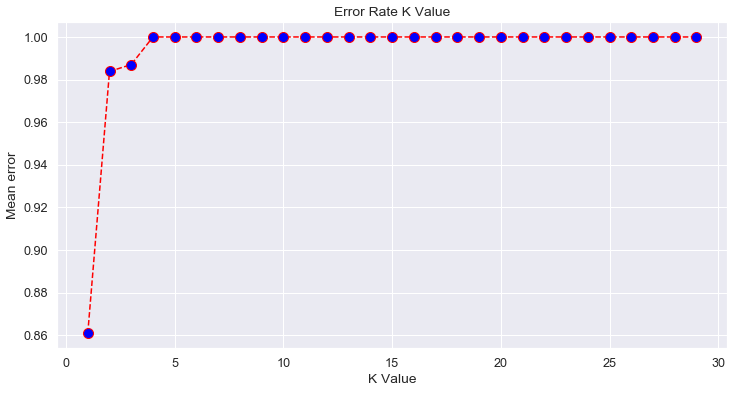

In [90]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [91]:
#k=3 sutable
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [92]:
y_pred = model.predict(X_test)
acc_knn = metrics.r2_score(y_test, y_pred)
print('Performance on training:', model.score(X_train,y_train) )
print('Performance on testing:', model.score(X_test,y_test))
print('Accuracy: ', acc_knn)

Performance on training: 0.8975931742370428
Performance on testing: 0.7972795943836892
Accuracy:  0.7972795943836892


In [93]:
tempscore = pd.DataFrame({'Method':['KNeighbors Regressor'], 'Accuracy': [acc_knn], 'Remarks': 'Traning 89'},index={'15'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1                 Decision Tree  0.807232      OverFit
2           Decision Tree Kfold  0.864713      OverFit
3     Decision Tree Drop Values  0.851216      OverFit
4          Pruned Decision Tree  0.660738  Traning .75
5                 Pruned K Fold  0.864713             
6                   Pruned DT 2  0.663035   Traning 74
7       Random Forest Regressor  0.874560      OverFit
8                     RFR Kfold  0.909874             
9   Gradient Boosting Regressor  0.888545   Traning 94
10                    GBR KFold  0.897565             
11       Ada Boosting Regressor  0.757705   Traning 81
12                 Ada BR KFold  0.774401             
13            Bagging Regressor  0.866882   Traning 97
14      Bagging Regressor KFold  0.905403             
15         KNeighbors Regressor  0.797280   Traning 89

In [94]:
num_folds = 11
seed = 73
kfold = KFold(n_splits=num_folds, random_state=seed)
result_kf = cross_val_score(model,X, y, cv=kfold)
acc_kkf=np.mean(abs(result_kf))
print('K fold accuracy: ',acc_kkf)
print('K fold  Standard Deviation: ',result_kf.std())

K fold accuracy:  0.7965316447938663
K fold  Standard Deviation:  0.044886791897736235


In [95]:
tempscore = pd.DataFrame({'Method':['KNN KFold'], 'Accuracy': [acc_kkf], 'Remarks': ''},index={'16'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1                 Decision Tree  0.807232      OverFit
2           Decision Tree Kfold  0.864713      OverFit
3     Decision Tree Drop Values  0.851216      OverFit
4          Pruned Decision Tree  0.660738  Traning .75
5                 Pruned K Fold  0.864713             
6                   Pruned DT 2  0.663035   Traning 74
7       Random Forest Regressor  0.874560      OverFit
8                     RFR Kfold  0.909874             
9   Gradient Boosting Regressor  0.888545   Traning 94
10                    GBR KFold  0.897565             
11       Ada Boosting Regressor  0.757705   Traning 81
12                 Ada BR KFold  0.774401             
13            Bagging Regressor  0.866882   Traning 97
14      Bagging Regressor KFold  0.905403             
15         KNeighbors Regressor  0.797280   Traning 89
16                    KNN KFold  0.796532

### Support Vector Regressor

In [96]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [97]:
y_pred = model.predict(X_test)
acc_svr = metrics.r2_score(y_test, y_pred)
print('Performance on training:', model.score(X_train,y_train) )
print('Performance on testing:', model.score(X_test,y_test))
print('Accuracy: ', acc_svr)

Performance on training: 0.706716441951095
Performance on testing: 0.7229522732770355
Accuracy:  0.7229522732770355


In [98]:
tempscore = pd.DataFrame({'Method':['Support Vector Regressor'], 'Accuracy': [acc_svr], 'Remarks': 'Traning 70'},index={'17'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1                 Decision Tree  0.807232      OverFit
2           Decision Tree Kfold  0.864713      OverFit
3     Decision Tree Drop Values  0.851216      OverFit
4          Pruned Decision Tree  0.660738  Traning .75
5                 Pruned K Fold  0.864713             
6                   Pruned DT 2  0.663035   Traning 74
7       Random Forest Regressor  0.874560      OverFit
8                     RFR Kfold  0.909874             
9   Gradient Boosting Regressor  0.888545   Traning 94
10                    GBR KFold  0.897565             
11       Ada Boosting Regressor  0.757705   Traning 81
12                 Ada BR KFold  0.774401             
13            Bagging Regressor  0.866882   Traning 97
14      Bagging Regressor KFold  0.905403             
15         KNeighbors Regressor  0.797280   Traning 89
16                    KNN KFold  0.796532             
17     Support Vector Regressor  0.722952   Traning 70

In [99]:
num_folds = 11
seed = 73
kfold = KFold(n_splits=num_folds, random_state=seed)
result_kf = cross_val_score(model,X, y, cv=kfold)
acc_svrkf=np.mean(abs(result_kf))
print('K fold accuracy: ',acc_svrkf)
print('K fold  Standard Deviation: ',result_kf.std())

K fold accuracy:  0.6986369020819705
K fold  Standard Deviation:  0.0477388617654347


In [100]:
tempscore = pd.DataFrame({'Method':['SVR KFold'], 'Accuracy': [acc_svrkf], 'Remarks': ''},index={'18'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1                 Decision Tree  0.807232      OverFit
2           Decision Tree Kfold  0.864713      OverFit
3     Decision Tree Drop Values  0.851216      OverFit
4          Pruned Decision Tree  0.660738  Traning .75
5                 Pruned K Fold  0.864713             
6                   Pruned DT 2  0.663035   Traning 74
7       Random Forest Regressor  0.874560      OverFit
8                     RFR Kfold  0.909874             
9   Gradient Boosting Regressor  0.888545   Traning 94
10                    GBR KFold  0.897565             
11       Ada Boosting Regressor  0.757705   Traning 81
12                 Ada BR KFold  0.774401             
13            Bagging Regressor  0.866882   Traning 97
14      Bagging Regressor KFold  0.905403             
15         KNeighbors Regressor  0.797280   Traning 89
16                    KNN KFold  0.796532             
17     Support Vector Regressor  0.722952   Traning 70
18                    SVR KFold  0.698637

## Ensemeble

In [101]:
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear') 

In [102]:
model=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
model.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='linear',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False))],
                n_jobs=None, weights=None)

In [103]:
y_pred = model.predict(X_test)
acc_env = metrics.r2_score(y_test, y_pred)
print('Performance on training:', model.score(X_train,y_train) )
print('Performance on testing:', model.score(X_test,y_test))
print('Accuracy: ', acc_env)

Performance on training: 0.8184111558003708
Performance on testing: 0.7941913831810632
Accuracy:  0.7941913831810632


In [104]:
tempscore = pd.DataFrame({'Method':['Ensemeble'], 'Accuracy': [acc_env], 'Remarks': 'Traning 81'},index={'19'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1                 Decision Tree  0.807232      OverFit
2           Decision Tree Kfold  0.864713      OverFit
3     Decision Tree Drop Values  0.851216      OverFit
4          Pruned Decision Tree  0.660738  Traning .75
5                 Pruned K Fold  0.864713             
6                   Pruned DT 2  0.663035   Traning 74
7       Random Forest Regressor  0.874560      OverFit
8                     RFR Kfold  0.909874             
9   Gradient Boosting Regressor  0.888545   Traning 94
10                    GBR KFold  0.897565             
11       Ada Boosting Regressor  0.757705   Traning 81
12                 Ada BR KFold  0.774401             
13            Bagging Regressor  0.866882   Traning 97
14      Bagging Regressor KFold  0.905403             
15         KNeighbors Regressor  0.797280   Traning 89
16                    KNN KFold  0.796532             
17     Support Vector Regressor  0.722952   Traning 70
18                    SVR KFold  0.698637             
19                    Ensemeble  0.794191   Traning 81

In [105]:
num_folds = 11
seed = 73
kfold = KFold(n_splits=num_folds, random_state=seed)
result_kf = cross_val_score(model,X, y, cv=kfold)
acc_envkf=np.mean(abs(result_kf))
print('K fold accuracy: ',acc_envkf)
print('K fold  Standard Deviation: ',result_kf.std())

K fold accuracy:  0.7815711754837159
K fold  Standard Deviation:  0.039731774242915456


In [106]:
tempscore = pd.DataFrame({'Method':['Ensemeble KFold'], 'Accuracy': [acc_envkf], 'Remarks': ''},index={'20'})
score = pd.concat([score, tempscore])
score

Method  Accuracy      Remarks
1                 Decision Tree  0.807232      OverFit
2           Decision Tree Kfold  0.864713      OverFit
3     Decision Tree Drop Values  0.851216      OverFit
4          Pruned Decision Tree  0.660738  Traning .75
5                 Pruned K Fold  0.864713             
6                   Pruned DT 2  0.663035   Traning 74
7       Random Forest Regressor  0.874560      OverFit
8                     RFR Kfold  0.909874             
9   Gradient Boosting Regressor  0.888545   Traning 94
10                    GBR KFold  0.897565             
11       Ada Boosting Regressor  0.757705   Traning 81
12                 Ada BR KFold  0.774401             
13            Bagging Regressor  0.866882   Traning 97
14      Bagging Regressor KFold  0.905403             
15         KNeighbors Regressor  0.797280   Traning 89
16                    KNN KFold  0.796532             
17     Support Vector Regressor  0.722952   Traning 70
18                    SVR KFold  0.698637             
19                    Ensemeble  0.794191   Traning 81
20              Ensemeble KFold  0.781571

- As compared with all Models Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold, Bagging Regressor are giving better score.

### Bootstrap Sampling

In [107]:
concrete_join = X.join(y)

In [108]:
values = concrete_join.values
n_iterations = 1000        
n_size = int(len(concrete_z) * 1)    

stats = list()   
for i in range(n_iterations):
    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    y_test = test[:,-1]    
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  
    stats.append(score)

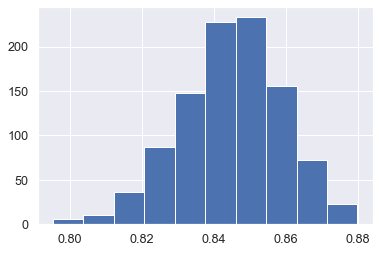

95.0 confidence interval 81.5% and 87.1%


In [109]:
plt.hist(stats)
plt.show()
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### Random Forest Regressor

In [110]:
values = concrete_join.values
n_iterations = 1000
n_size = int(len(concrete_z) * 1)    

stats = list()   
for i in range(n_iterations):
    train = resample(values, n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    rfTree = RandomForestRegressor(n_estimators=100)
    rfTree.fit(train[:,:-1], train[:,-1]) 
    y_test = test[:,-1]
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  
    stats.append(score)

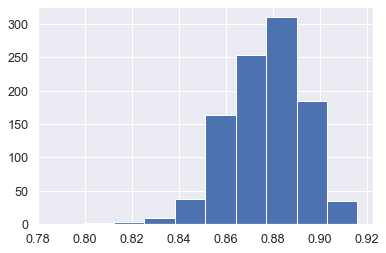

95.0 confidence interval 84.5% and 90.5%


In [111]:
plt.hist(stats)
plt.show()
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

- The bootstrap random forest model performance is better than other algorithms.